In [160]:
from scipy.stats import multivariate_normal
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [ ]:
x = np.random.normal(size=(5,))
y = np.outer(x, x)
z = np.random.multivariate_normal(np.zeros(5), y)    

In [87]:
a = np.random.random(3)
np.outer(a, a)

array([[ 0.11724452,  0.33953432,  0.31318113],
       [ 0.33953432,  0.98327459,  0.90695704],
       [ 0.31318113,  0.90695704,  0.83656293]])

In [238]:
def generateMuAndSigma(d):
    np.random.seed(2125)
    mu = np.random.random(d)  
    a = np.random.random(d)
    Sigma = 1e-5 * np.outer(a, a) + 1e-8*np.eye(d)
    
    #this won't work
    #A = np.random.random((d,d))
    #Sigma = (0.5 * (A + A.T)) + 1e-8*np.eye(d)
    return mu, Sigma
    

In [239]:
d = 70
N = 10
mu, Sigma = generateMuAndSigma(d)
mvn = multivariate_normal(mean=mu, cov=Sigma)
Xtrain = mvn.rvs(N)
ytrain = mvn.pdf(Xtrain)

N_test = 100
Xtest = mvn.rvs(N_test)
ytest = mvn.pdf(Xtest)

In [240]:
# make sure the (x, y) are really from Multivariate Normal 
i = 5
x = Xtrain[i,:]
vec_d = x - mu
norm = np.sqrt(np.power(2*np.pi, d) * np.linalg.det(Sigma))
y_est = (1.0/norm) * np.exp(-0.5*vec_d.dot(np.linalg.inv(Sigma).dot(vec_d)))
print(y_est, ytrain[i])

inf 1.40723689235e+232


/Users/chengweiliu/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in double_scalars


def calculateCostFunction(X, y, w):
    vec_d = y - X.dot(w)
    return 0.5 * vec_d.T.dot(vec_d)

def gradientDescent(Xtrain, ytrain, early_stop_criterion=1e-7, nIter=10000, eta=0.0000001):
    
    N, d = Xtrain.shape
    w = np.zeros((d+1))
    
    X = np.concatenate([np.ones(N).reshape((N,1)), Xtrain], 1)
    
    J = []
    for _ in range(nIter):
        old_w = w
        w = w + eta * X.T.dot(ytrain - X.dot(w))
        J.append(calculateCostFunction(X, ytrain, w))
        if np.all(np.abs(w - old_w) < early_stop_criterion):
            break
    return w, np.array(J)


In [232]:
w, J = gradientDescent(Xtrain, ytrain)

In [233]:
J[0:10]

array([ inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf])

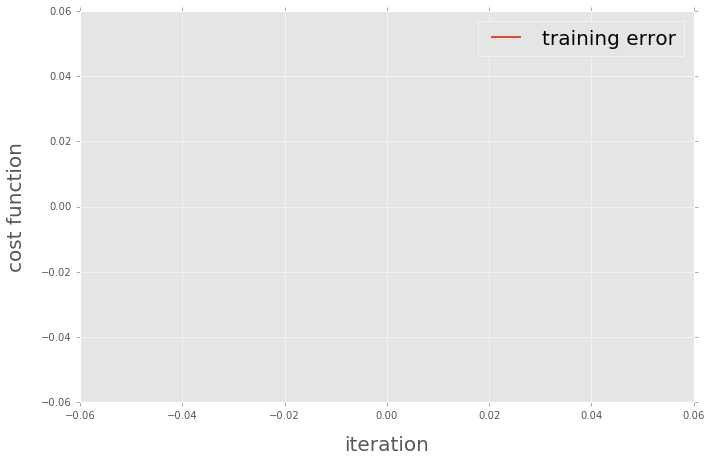

In [212]:
FONTSIZE = 20
plt.close('all')
fig, ax = plt.subplots(1, figsize=(11, 7))
n_iter = len(J)
xs = 1 + np.arange(n_iter)
ax.plot(xs, J, lw=2, label='training error')
ax.set_xlabel('iteration', fontsize=FONTSIZE, labelpad=15)
ax.set_ylabel('cost function', fontsize=FONTSIZE, labelpad=15)
ax.legend(loc=1, fontsize=FONTSIZE)

In [177]:
y_

array([  1.52044444e+264,   1.52044323e+264,   1.52044201e+264,
         1.52044079e+264,   1.52043957e+264,   1.52043835e+264,
         1.52043713e+264,   1.52043592e+264,   1.52043470e+264,
         1.52043348e+264])